In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv(r"C:\Users\OMEN\Desktop\archive\Mall_Customers.csv")
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
df_missing_values = df.isnull().sum()
df_missing_values


CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [5]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


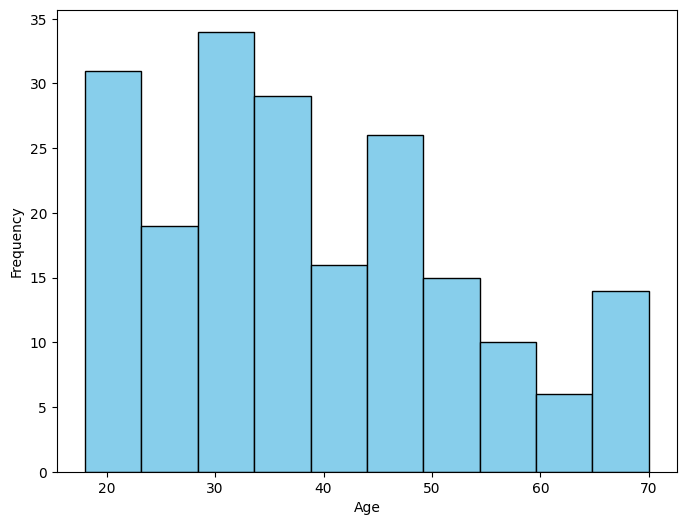

In [6]:
plt.figure(figsize  = (8,6))
plt.hist(df["Age"], color = "skyblue", edgecolor = "black")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()


<Axes: xlabel='Age', ylabel='Density'>

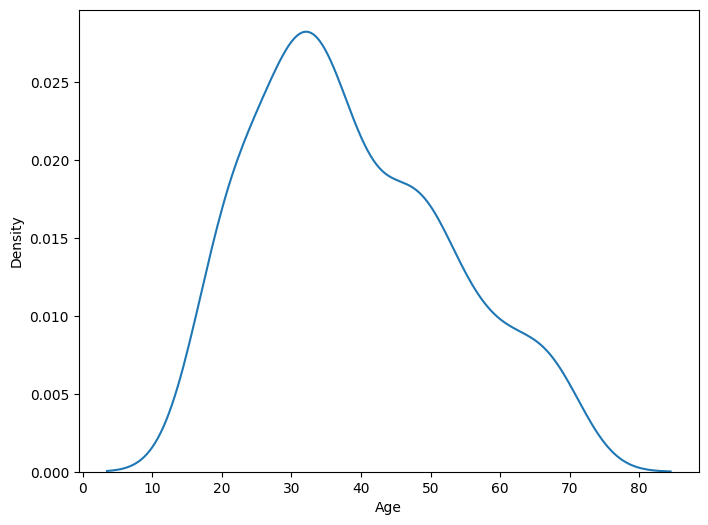

In [7]:
plt.figure(figsize=(8,6))
sns.kdeplot(df["Age"])

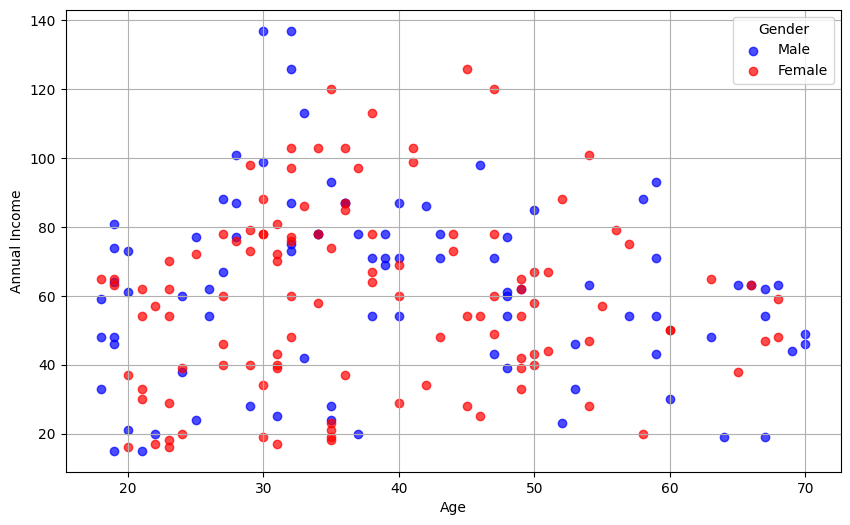

In [20]:
# Define colors for genders
colors = {'Male': 'blue', 'Female': 'red'}

plt.figure(figsize=(10,6))
for gender in df['Gender'].unique():
    subset = df[df['Gender']== gender]
    plt.scatter(subset['Age'], subset['Annual Income (k$)'], c= colors[gender],  label=gender, alpha=0.7)

plt.xlabel('Age')
plt.ylabel('Annual Income')
plt.legend(title='Gender')
plt.grid(True)
plt.show()

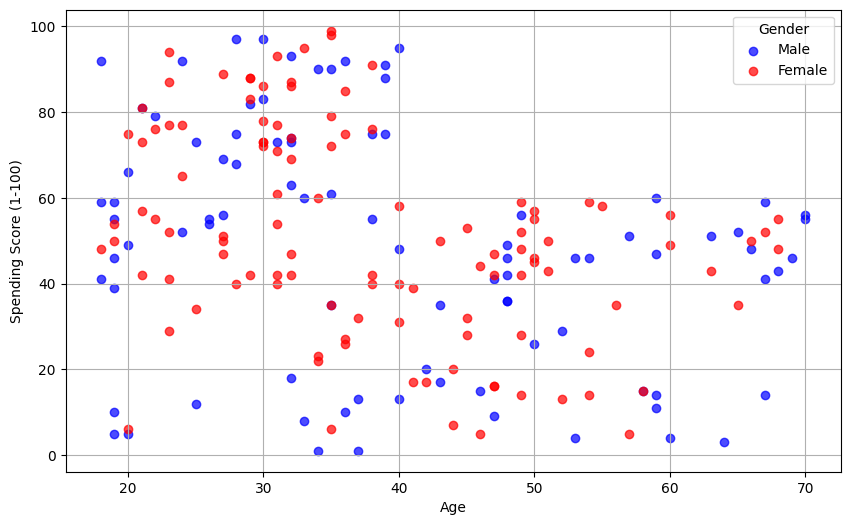

In [21]:
plt.figure(figsize=(10,6))
for gender in df['Gender'].unique():
    subset = df[df['Gender']== gender]
    plt.scatter(subset['Age'], subset['Spending Score (1-100)'], c= colors[gender],  label=gender, alpha=0.7)

plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Gender')
plt.grid(True)
plt.show()


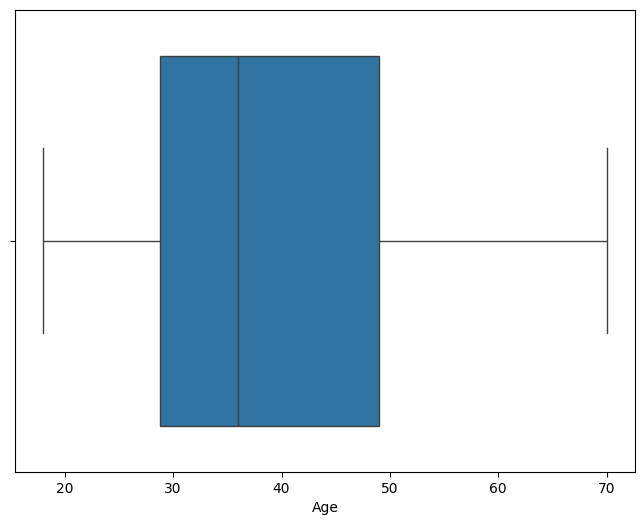

In [34]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Age'])

plt.show()

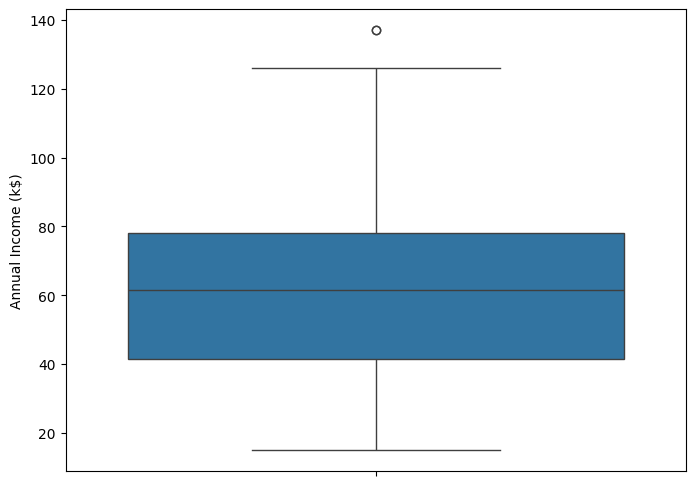

In [35]:
plt.figure(figsize=(8,6))
sns.boxplot(df["Annual Income (k$)"])
plt.show()

In [36]:
df_cleaned = df[df["Annual Income (k$)"] <= 136]
df_cleaned.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,198.000000,198.000000,198.000000,198.000000
mean,99.500000,38.929293,59.787879,50.196970
std,57.301832,14.016852,25.237259,25.746846
min,1.000000,18.000000,15.000000,1.000000
25%,50.250000,28.250000,40.500000,35.000000
50%,99.500000,36.000000,61.000000,50.000000
75%,148.750000,49.000000,77.750000,72.750000
max,198.000000,70.000000,126.000000,99.000000


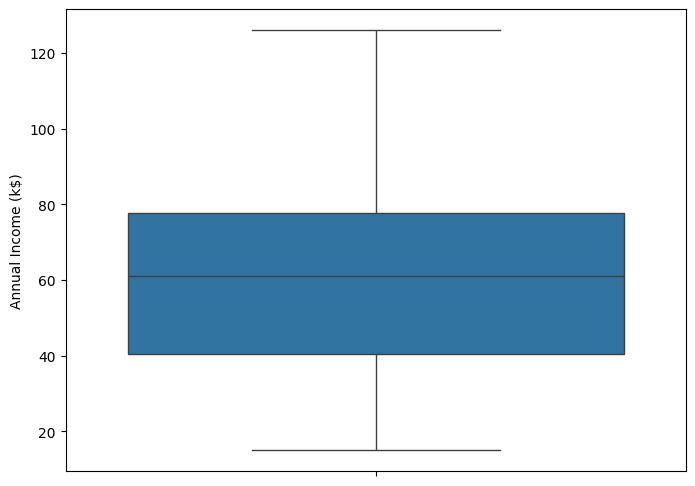

In [37]:
plt.figure(figsize=(8,6))
sns.boxplot(df_cleaned["Annual Income (k$)"])
plt.show()

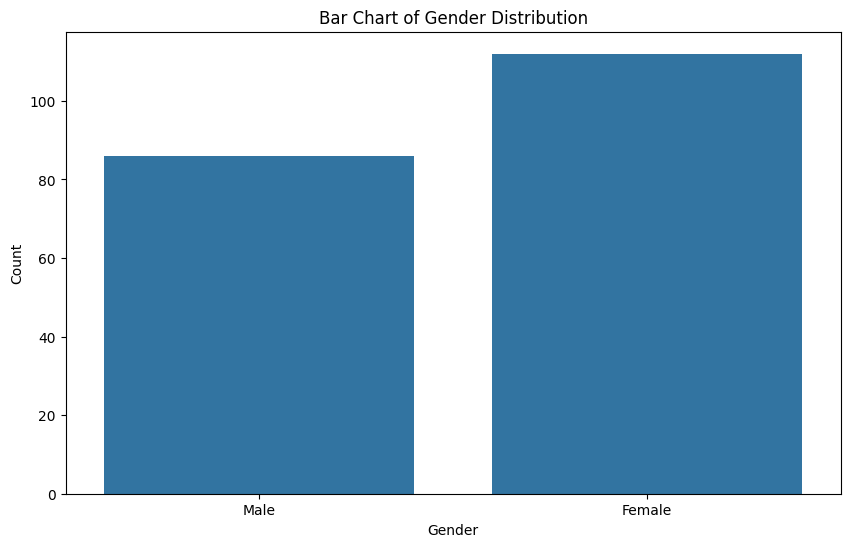

In [38]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Gender', data=df_cleaned)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Bar Chart of Gender Distribution')
plt.show()

In [39]:
# One-hot encoding the 'Gender' column
df_cleaned = pd.get_dummies(df, columns=['Gender'], drop_first=True)

In [40]:
df_cleaned['Gender_Male'] = df_cleaned['Gender_Male'].astype(int)

In [41]:
df_cleaned

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,1,19,15,39,1
1,2,21,15,81,1
2,3,20,16,6,0
3,4,23,16,77,0
4,5,31,17,40,0
...,...,...,...,...,...
195,196,35,120,79,0
196,197,45,126,28,0
197,198,32,126,74,1
198,199,32,137,18,1


In [42]:
#Standardise The Columns before PCA Analysis

# scaler = StandardScaler()
# columns_to_standardize = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
# df_cleaned[columns_to_standardize] = scaler.fit_transform(df_cleaned[columns_to_standardize])

In [43]:
features = df_cleaned[['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender_Male']]
features

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0
...,...,...,...,...
195,35,120,79,0
196,45,126,28,0
197,32,126,74,1
198,32,137,18,1


In [44]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_samples, silhouette_score

In [45]:
# Standardize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

In [46]:
#Apply PCA
pca = PCA(n_components=2) #Reduce to 2 components for visualization
features_pca = pca.fit_transform(features_scaled)
features_pca


array([[-4.06382715e-01, -5.20713635e-01],
       [-1.42767287e+00, -3.67310199e-01],
       [ 5.07605706e-02, -1.89406774e+00],
       [-1.69451310e+00, -1.63190805e+00],
       [-3.13108383e-01, -1.81048272e+00],
       [-1.71744627e+00, -1.59926418e+00],
       [ 7.90821124e-01, -1.94727112e+00],
       [-2.14832159e+00, -1.50537369e+00],
       [ 2.77428623e+00, -8.82987672e-01],
       [-1.21629477e+00, -1.61640464e+00],
       [ 2.62905084e+00, -8.61237043e-01],
       [-1.68947038e+00, -1.54542784e+00],
       [ 1.68582253e+00, -2.02394479e+00],
       [-1.64607339e+00, -1.52251259e+00],
       [ 1.17443628e+00, -6.12790961e-01],
       [-1.32613070e+00, -2.36719149e-01],
       [ 1.67728253e-02, -1.74344572e+00],
       [-1.07842454e+00, -2.44715641e-01],
       [ 1.48758780e+00, -5.72676028e-01],
       [-1.66373169e+00, -1.43259774e+00],
       [ 4.88090311e-01, -3.92921145e-01],
       [-1.01895051e+00, -1.66247511e-01],
       [ 1.35891492e+00, -1.82866936e+00],
       [-7.

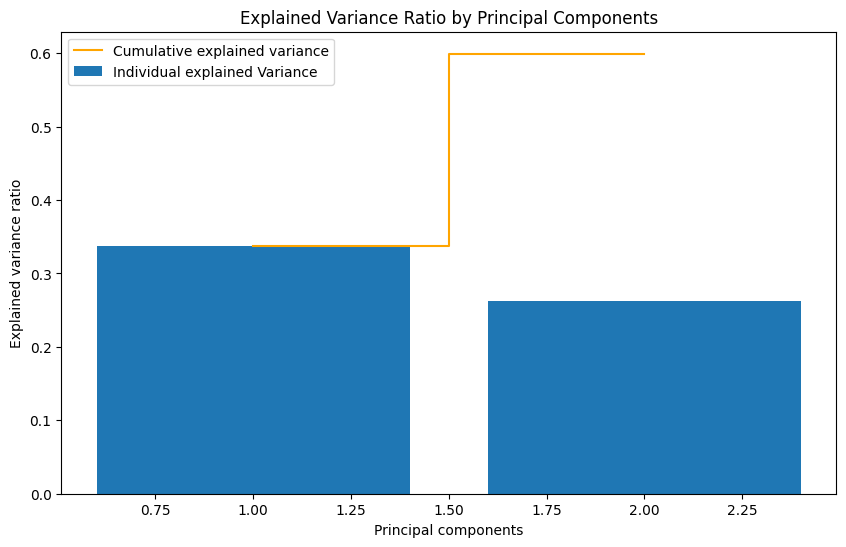

In [47]:
plt.figure(figsize=(10,6))
plt.bar(range(1, 3), pca.explained_variance_ratio_, align = 'center', label = 'Individual explained Variance')
plt.step(range(1, 3), pca.explained_variance_ratio_.cumsum(), where='mid', label='Cumulative explained variance',color = 'Orange')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.title('Explained Variance Ratio by Principal Components')
plt.legend(loc='best')
plt.show()

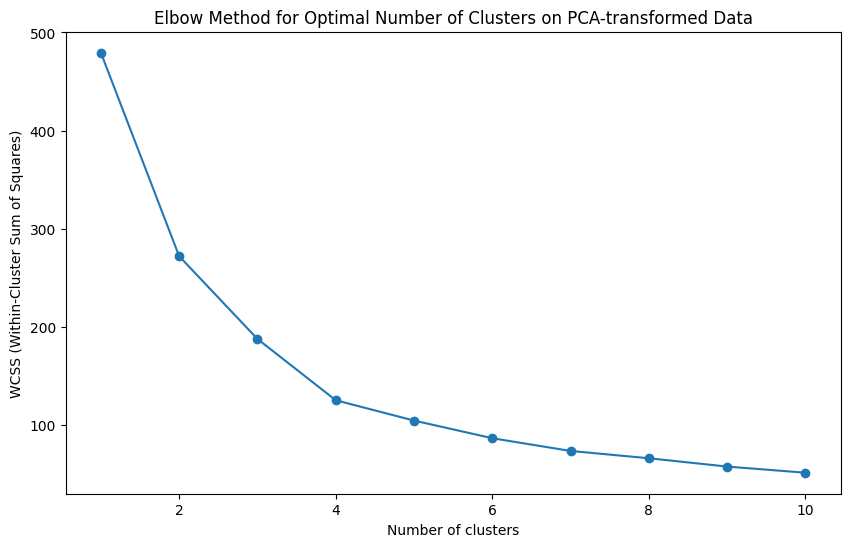

In [48]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter = 300, n_init=10, random_state=42)
    kmeans.fit(features_pca)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10,6))
plt.plot(range(1,11), wcss, marker = 'o')
plt.title('Elbow Method for Optimal Number of Clusters on PCA-transformed Data')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.show()

In [54]:
optimal_clusters = 3
kmeans = KMeans(n_clusters = optimal_clusters, init = 'k-means++', max_iter= 300, n_init= 10,random_state = 42)
clusters = kmeans.fit_predict(features_pca)
features['Clusters'] = clusters

features.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male,Clusters
0,19,15,39,1,0
1,21,15,81,1,1
2,20,16,6,0,0
3,23,16,77,0,0
4,31,17,40,0,0


               Age                   Annual Income (k$)                    \
              mean median        std               mean median        std   
Clusters                                                                    
0         38.27027   35.0  13.412627          43.135135   43.0  16.846872   
1         29.00000   30.0   6.308984          71.919355   74.5  25.576820   
2         49.06250   48.0  12.944172          69.703125   71.0  25.459385   

         Spending Score (1-100)                   Gender_Male                   
                           mean median        std        mean median       std  
Clusters                                                                        
0                     48.702703   48.0  20.294901    0.040541    0.0  0.198569  
1                     74.500000   75.0  15.485318    0.596774    1.0  0.494550  
2                     28.390625   26.5  18.166441    0.750000    1.0  0.436436  


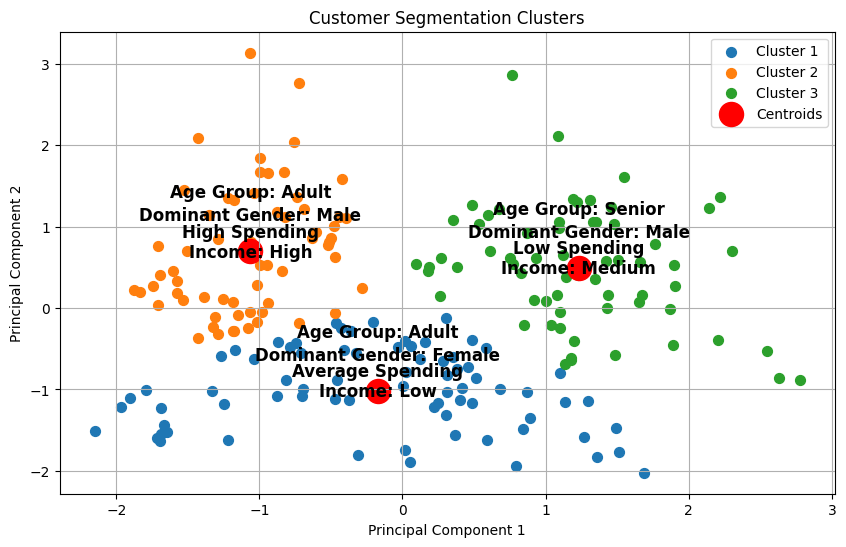

In [62]:
plt.figure(figsize=(10, 6))
for cluster in range(optimal_clusters):
    plt.scatter(
        features_pca[clusters == cluster, 0],
        features_pca[clusters == cluster, 1],
        s=50,
        label=f'Cluster {cluster + 1}'
    )

# Plot the centroids
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='red', label='Centroids')

# Categorizing Age
def categorize_age(age):
    if age < 25:
        return 'Young'
    elif 25 <= age < 45:
        return 'Adult'
    else:
        return 'Senior'
    
cluster_age_groups = features.groupby('Clusters')['Age'].mean().apply(categorize_age)
for i in range(3):
    plt.annotate(f'Age Group: {cluster_age_groups[i]}', 
                 (centroids[i, 0], centroids[i, 1] + 0.4), textcoords="offset points", 
                 xytext=(0,15), ha='center', fontsize=12, color='Black', fontweight='bold')
    
# Categorizing Income
def categorize_income(income):
    if income < 45:
        return 'Low'
    elif 45 <= income < 70:
        return 'Medium'
    else:
        return 'High'
    
cluster_income_groups = features.groupby('Clusters')['Annual Income (k$)'].mean().apply(categorize_income)
for i in range(3):
    plt.annotate(f'Income: {cluster_income_groups[i]}', 
                 (centroids[i, 0], centroids[i, 1] - 0.5), textcoords="offset points", 
                 xytext=(0,35), ha='center', va='top', fontsize=12, color='Black', fontweight='bold')

# Categorizing Spending Score
annotations = ['Average Spending', 'High Spending', 'Low Spending']
for i, txt in enumerate(annotations):
    plt.annotate(txt, (centroids[i, 0], centroids[i, 1]), textcoords="offset points", 
                 xytext=(0,10), ha='center', fontsize=12, color='black', fontweight='bold')

#Categorizing Genders
cluster_gender_dominance = features.groupby('Clusters')['Gender_Male'].agg(lambda x: 'Male' if x.mean() > 0.5 else 'Female')
for i in range(3):
    plt.annotate(f'Dominant Gender: {cluster_gender_dominance[i]}', 
                 (centroids[i, 0], centroids[i, 1] + 0.2), textcoords="offset points", 
                 xytext=(0,10), ha='center', fontsize=12, color='Black', fontweight='bold')

cluster_stats = features.groupby('Clusters').agg(['mean', 'median', 'std'])

print(cluster_stats)


plt.title('Customer Segmentation Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid()
plt.show()

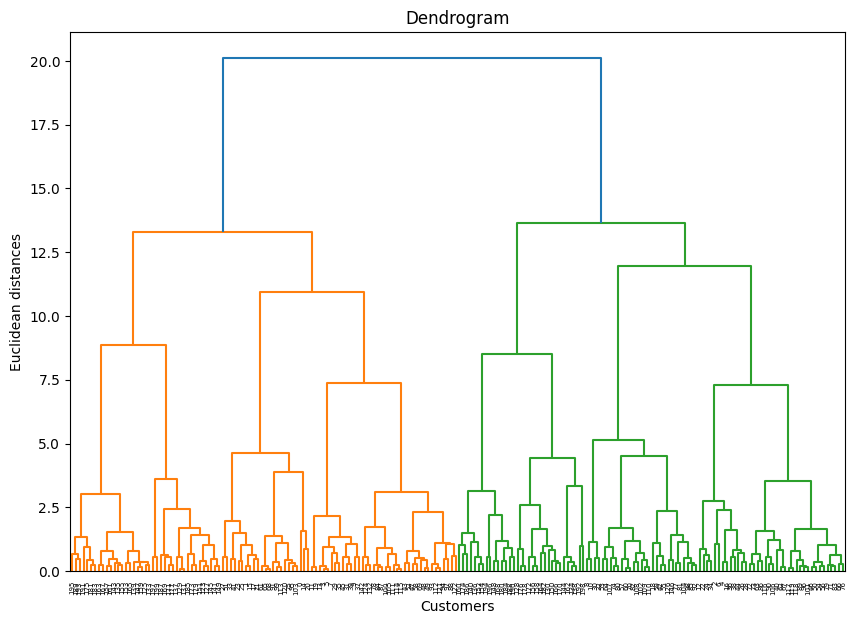

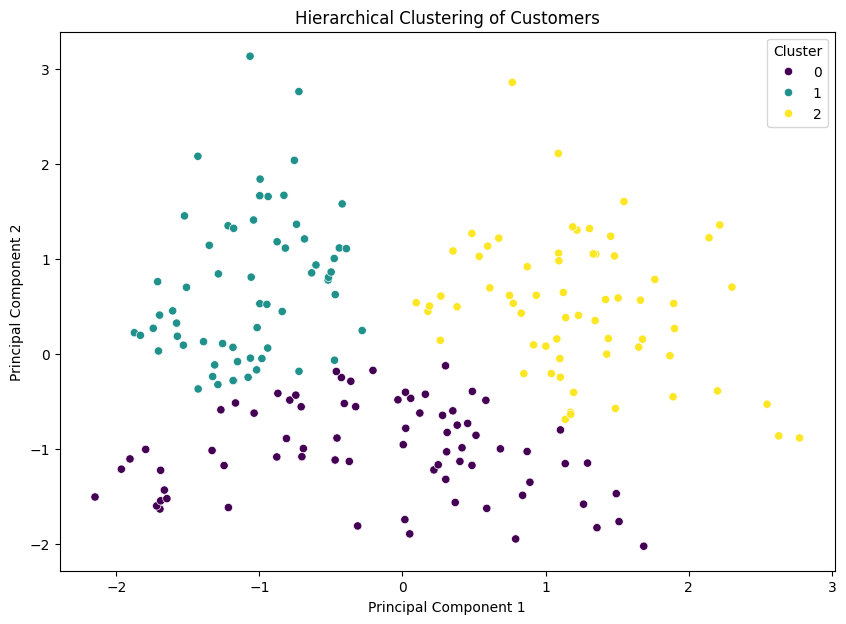

In [56]:
plt.figure(figsize=(10, 7))
Z = linkage(features_scaled, method='ward')
dendrogram(Z)
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

# Visualize the clusters
plt.figure(figsize=(10, 7))
sns.scatterplot(x=features_pca[:, 0], y=features_pca[:, 1], hue=clusters, palette='viridis')
plt.title('Hierarchical Clustering of Customers')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

For n_clusters = 3, the average silhouette_score is: 0.3886771378798139


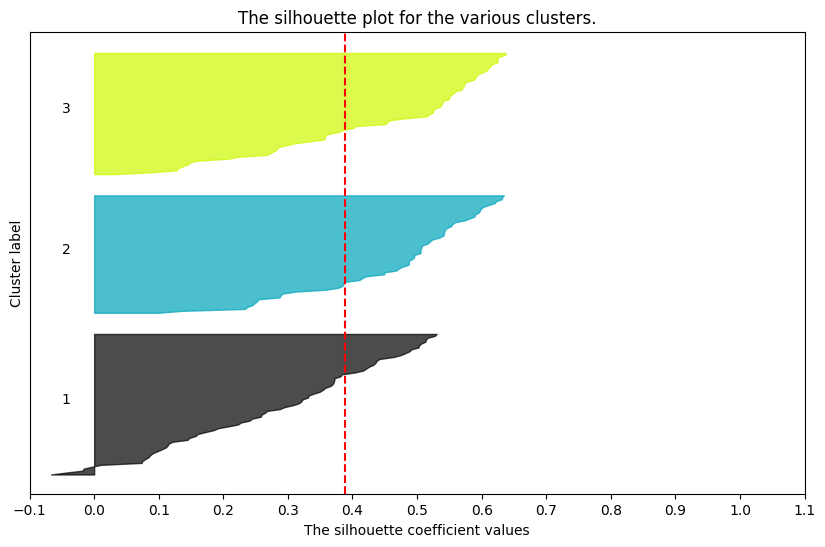

In [57]:
# Silhoutte Scores for every cluster
silhouette_avg = silhouette_score(features_pca, clusters)
print(f'For n_clusters = {optimal_clusters}, the average silhouette_score is: {silhouette_avg}')


sample_silhouette_values = silhouette_samples(features_pca, clusters)

fig, ax1 = plt.subplots(1, 1)
fig.set_size_inches(10, 6)

ax1.set_xlim([-0.1, 1])
ax1.set_ylim([0, len(features_pca) + (optimal_clusters + 1) * 10])

y_lower = 10
for i in range(optimal_clusters):
    ith_cluster_silhouette_values = sample_silhouette_values[clusters == i]
    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = plt.cm.nipy_spectral(float(i) / optimal_clusters)
    ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)

    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i + 1))

    y_lower = y_upper + 10

ax1.set_title("The silhouette plot for the various clusters.")
ax1.set_xlabel("The silhouette coefficient values")
ax1.set_ylabel("Cluster label")

ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

ax1.set_yticks([])  # Clear the yaxis labels / ticks
ax1.set_xticks(np.arange(-0.1, 1.1, 0.1))

plt.show()

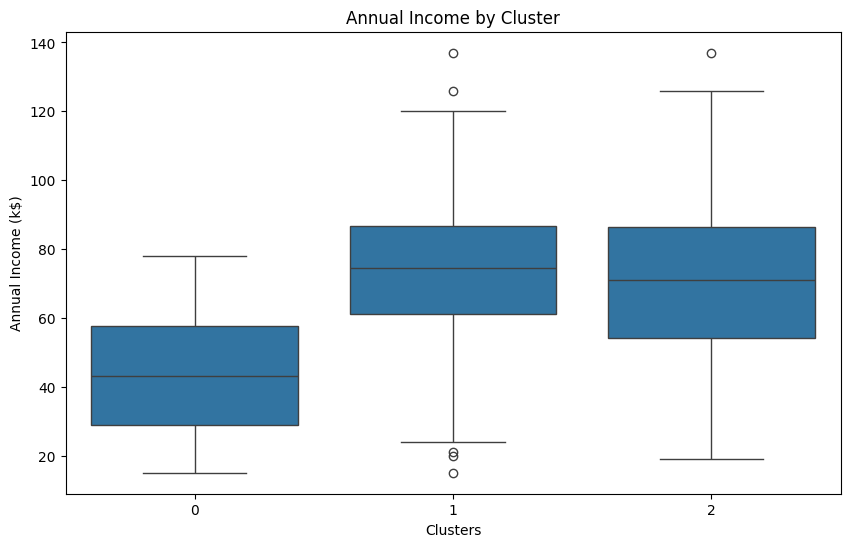

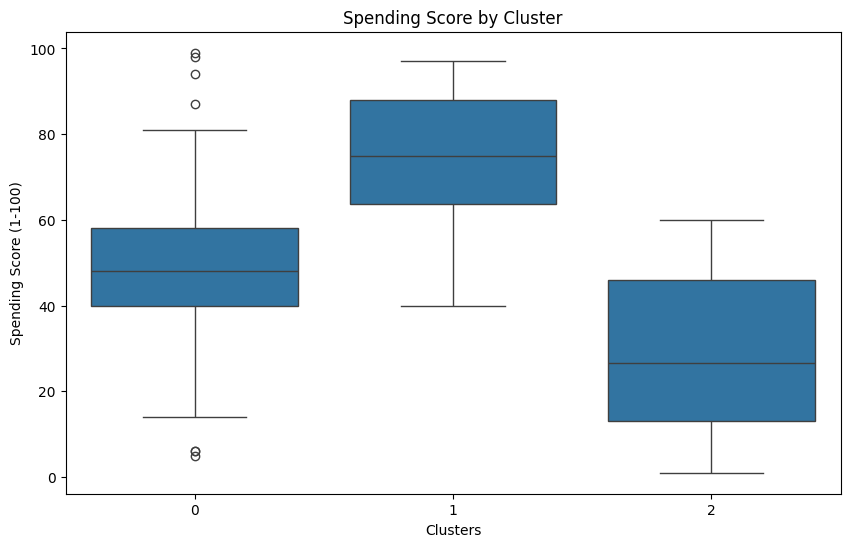

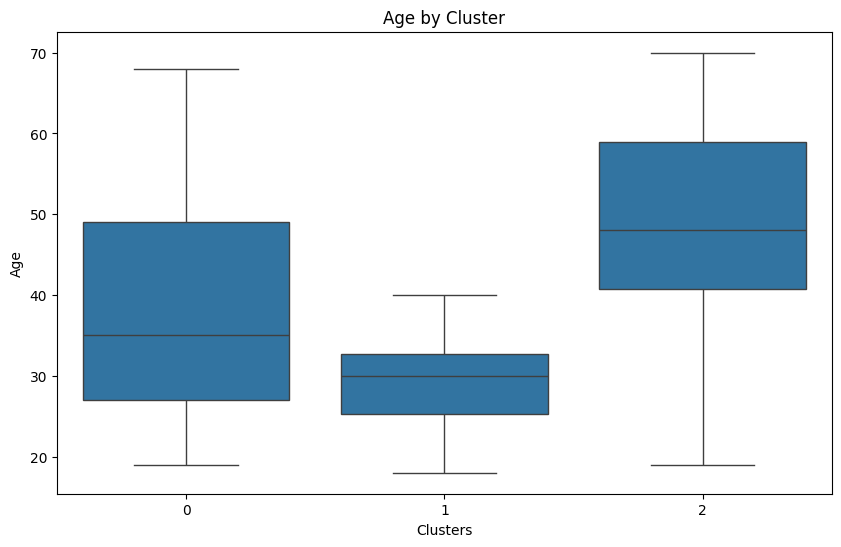

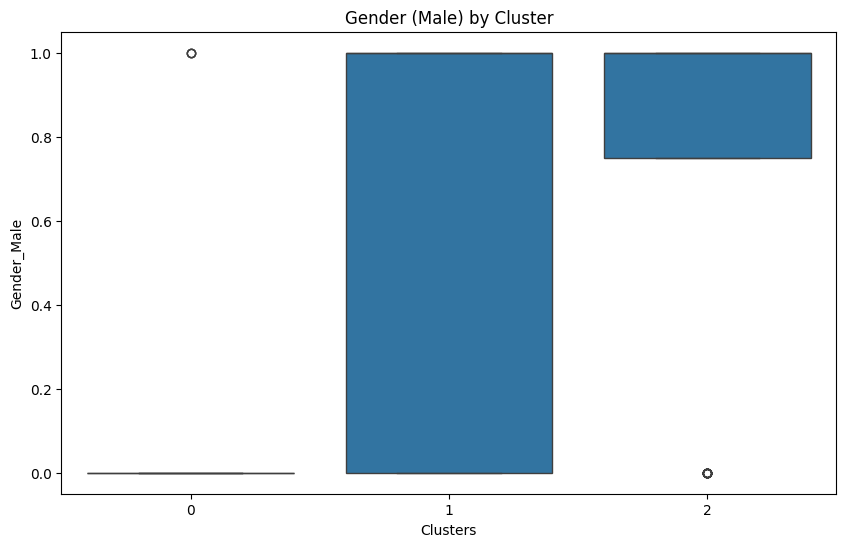

In [26]:
# Box plot for Annual Income by Cluster
plt.figure(figsize=(10, 6))
sns.boxplot(x='Clusters', y='Annual Income (k$)', data=features)
plt.title('Annual Income by Cluster')
plt.show()

# Box plot for Spending Score by Cluster
plt.figure(figsize=(10, 6))
sns.boxplot(x='Clusters', y='Spending Score (1-100)', data=features)
plt.title('Spending Score by Cluster')
plt.show()

# Box plot for Age by Cluster
plt.figure(figsize=(10, 6))
sns.boxplot(x='Clusters', y='Age', data=features)
plt.title('Age by Cluster')
plt.show()

# Box plot for Gender_Male by Cluster
plt.figure(figsize=(10, 6))
sns.boxplot(x='Clusters', y='Gender_Male', data=features)
plt.title('Gender (Male) by Cluster')
plt.show()

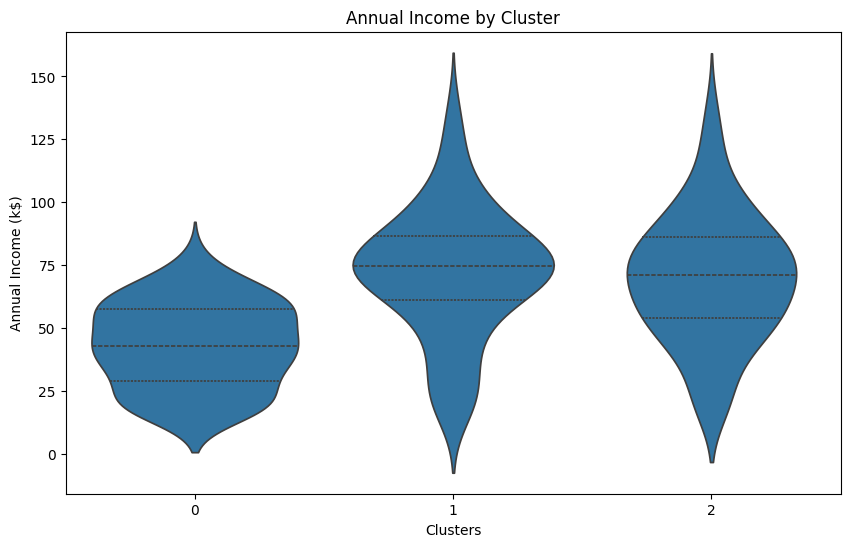

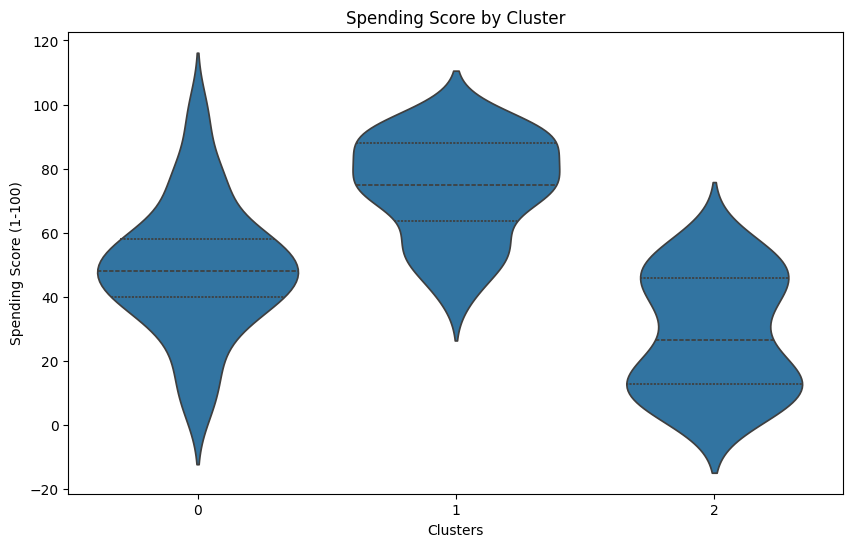

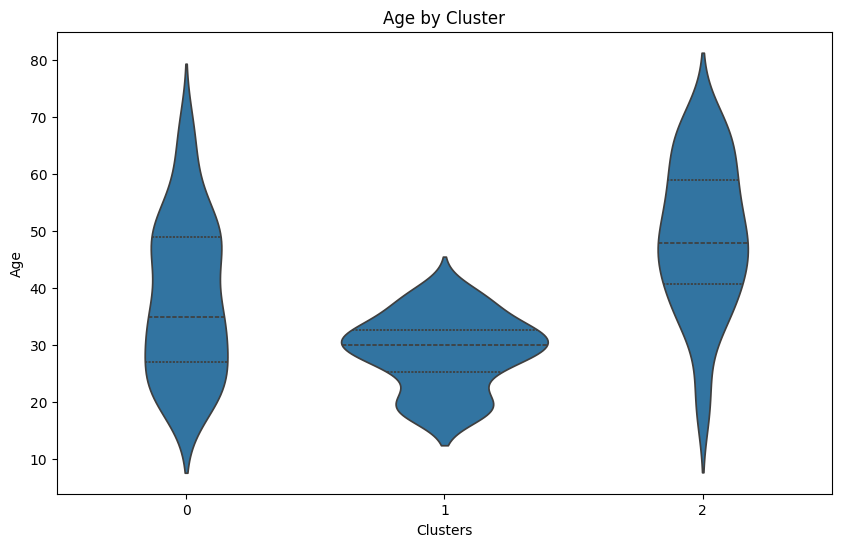

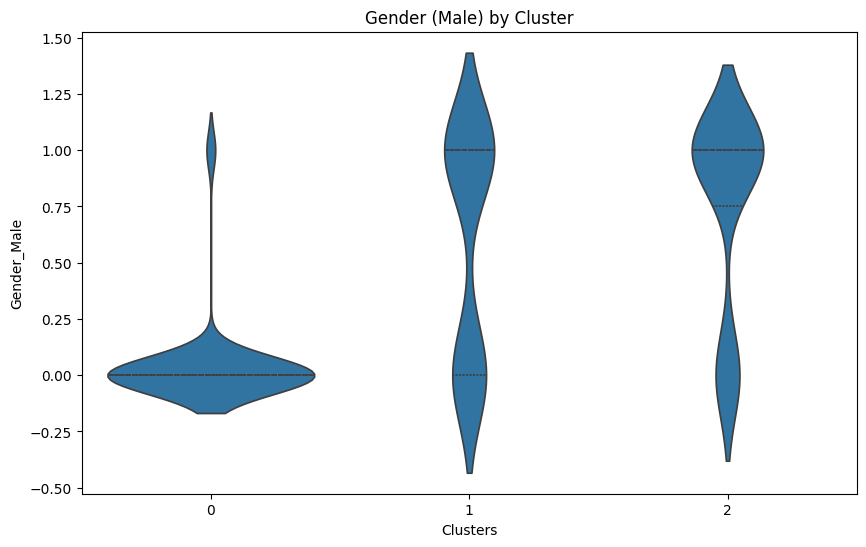

In [27]:
# Violin plot for Annual Income by Cluster
plt.figure(figsize=(10, 6))
sns.violinplot(x='Clusters', y='Annual Income (k$)', data=features, inner='quartile')
plt.title('Annual Income by Cluster')
plt.show()

# Violin plot for Spending Score by Cluster
plt.figure(figsize=(10, 6))
sns.violinplot(x='Clusters', y='Spending Score (1-100)', data=features, inner='quartile')
plt.title('Spending Score by Cluster')
plt.show()

# Violin plot for Age by Cluster
plt.figure(figsize=(10, 6))
sns.violinplot(x='Clusters', y='Age', data=features, inner='quartile')
plt.title('Age by Cluster')
plt.show()

# Violin plot for Gender_Male by Cluster
plt.figure(figsize=(10, 6))
sns.violinplot(x='Clusters', y='Gender_Male', data=features, inner='quartile')
plt.title('Gender (Male) by Cluster')
plt.show()

